In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.io import wavfile

In [2]:
def adjust_amplitude(data, amplitude = 8192):
    if type(data) != np.ndarray:
        data = np.array(data)
    w = amplitude / np.max(abs(data))
    rescaled_data = [w * d for d in data]
    # rescaled_data = np.concatenate(rescaled_data)
    rescaled_data = np.array(rescaled_data)
    return rescaled_data

def extend_length(data, scale):
    extended_data = []
    for sig in data:
        for i in range(scale):
            extended_data.append(sig)
    return extended_data

## Import data

In [3]:
path = '../brain/'
files = os.listdir(path)
files.remove('.DS_Store')
print(files)

['ext_braindata.dat', 'braindata.dat']


In [8]:
df = pd.read_csv(path + files[0])
print(len(df))
df.head(5)

7182


,Timestamp,Raw,Attention,Meditation,delta,theta,low-alpha,high-alpha,low-beta,high-beta,low-gamma,mid-gamma
0,2022-05-24T17:29:16.507626,-177,64,64,694808,188232,136635,26161,16092,34502,21563,7784
1,2022-05-24T17:29:17.008921,-181,70,70,1999281,14385,5165,24117,30364,5791,7462,1570
2,2022-05-24T17:29:17.509930,-233,70,70,1999281,14385,5165,24117,30364,5791,7462,1570
3,2022-05-24T17:29:18.011138,-561,56,67,1799494,99830,9278,39952,12219,7391,9344,3304
4,2022-05-24T17:29:18.512358,-23,56,67,1799494,99830,9278,39952,12219,7391,9344,3304


In [5]:
raw = df["Raw"].tolist()
attention = df["Attention"].tolist()
meditation = df["Meditation"].tolist()
delta = df["delta"].tolist()
lo_alpha = df["low-alpha"].tolist()
hi_alpha = df["high-alpha"].tolist()
lo_beta = df["low-beta"].tolist()
hi_beta = df["high-beta"].tolist()
lo_gamma = df["low-gamma"].tolist()
mid_gamma = df["mid-gamma"].tolist()

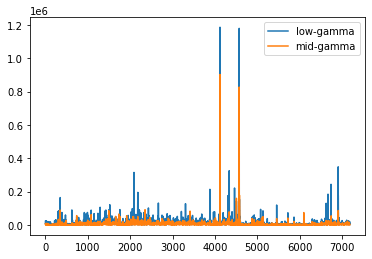

In [6]:
#plt.plot(raw)
#plt.plot(delta, label = "delta")
#plt.plot(lo_alpha, label = "low-alpha")
#plt.plot(hi_alpha, label = "high-alpha")
# plt.plot(lo_beta, label = "low-beta")
# plt.plot(hi_beta, label = "high-beta")
plt.plot(lo_gamma, label = "low-gamma")
plt.plot(mid_gamma, label = "mid-gamma")
plt.legend()
plt.show()

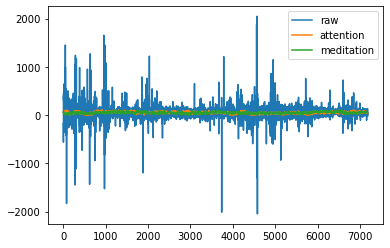

In [7]:
plt.plot(raw, label = 'raw')
plt.plot(attention, label = 'attention')
plt.plot(meditation, label = 'meditation')
plt.legend()
plt.show()

## Data handling

In [22]:
# Write audio file without any data modification

wavfile.write('../brain_music/raw_delta.wav', rate=44100, data=delta.astype(np.int16))
wavfile.write('../brain_music/raw_low_alpha.wav', rate=44100, data=lo_alpha.astype(np.int16))
wavfile.write('../brain_music/raw_high_alpha.wav', rate=44100, data=hi_alpha.astype(np.int16))
wavfile.write('../brain_music/raw_low_beta.wav', rate=44100, data=lo_beta.astype(np.int16))
wavfile.write('../brain_music/raw_high_beta.wav', rate=44100, data=hi_beta.astype(np.int16))
wavfile.write('../brain_music/raw_low_gamma.wav', rate=44100, data=lo_gamma.astype(np.int16))
wavfile.write('../brain_music/raw_mid_gamma.wav', rate=44100, data=mid_gamma.astype(np.int16))

In [34]:
# extend data length

default_sr = 44100 # sampling rate: 44.1 kHz
sec = 12 # expected time of the audio file

ext_delta = extend_length(delta, int(sec * default_sr / len(delta)))
ext_delta = np.array(ext_delta)

ext_lalpha = extend_length(lo_alpha, int(sec * default_sr / len(lo_alpha)))
ext_lalpha = np.array(ext_lalpha)

ext_halpha = extend_length(hi_alpha, int(sec * default_sr / len(hi_alpha)))
ext_halpha = np.array(ext_halpha)

ext_lbeta = extend_length(lo_beta, int(sec * default_sr / len(lo_beta)))
ext_lbeta = np.array(ext_lbeta)

ext_hbeta = extend_length(hi_beta, int(sec * default_sr / len(hi_beta)))
ext_hbeta = np.array(ext_hbeta)

ext_lgamma = extend_length(lo_gamma, int(sec * default_sr / len(lo_gamma)))
ext_lgamma = np.array(ext_lgamma)

ext_mgamma = extend_length(mid_gamma, int(sec * default_sr / len(mid_gamma)))
ext_mgamma = np.array(ext_mgamma)

In [23]:
# Standarize audio data (whitening)

std = StandardScaler()
scaled_delta = np.concatenate(std.fit_transform(ext_delta.reshape(-1, 1)))
scaled_lalpha = np.concatenate(std.fit_transform(ext_lalpha.reshape(-1, 1)))
scaled_halpha = np.concatenate(std.fit_transform(ext_halpha.reshape(-1, 1)))
scaled_lbeta = np.concatenate(std.fit_transform(ext_lbeta.reshape(-1, 1)))
scaled_hbeta = np.concatenate(std.fit_transform(ext_hbeta.reshape(-1, 1)))
scaled_lgamma = np.concatenate(std.fit_transform(ext_lgamma.reshape(-1, 1)))
scaled_mgamma = np.concatenate(std.fit_transform(ext_mgamma.reshape(-1, 1)))

# scaled_delta = np.concatenate(std.fit_transform(np.array(delta).reshape(-1, 1)))
# scaled_lalpha = np.concatenate(std.fit_transform(np.array(lo_alpha).reshape(-1, 1)))
# scaled_halpha = np.concatenate(std.fit_transform(np.array(hi_alpha).reshape(-1, 1)))
# scaled_lbeta = np.concatenate(std.fit_transform(np.array(lo_beta).reshape(-1, 1)))
# scaled_hbeta = np.concatenate(std.fit_transform(np.array(hi_beta).reshape(-1, 1)))
# scaled_lgamma = np.concatenate(std.fit_transform(np.array(lo_gamma).reshape(-1, 1)))
# scaled_mgamma = np.concatenate(std.fit_transform(np.array(mid_gamma).reshape(-1, 1)))

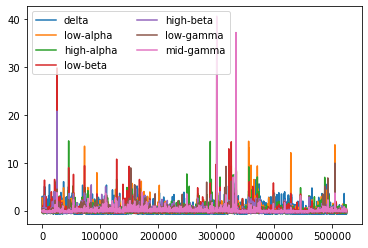

In [24]:
# Plot the whitened data

plt.plot(scaled_delta, label = "delta")
plt.plot(scaled_lalpha, label = "low-alpha")
plt.plot(scaled_halpha, label = "high-alpha")
plt.plot(scaled_lbeta, label = "low-beta")
plt.plot(scaled_hbeta, label = "high-beta")
plt.plot(scaled_lgamma, label = "low-gamma")
plt.plot(scaled_mgamma, label = "mid-gamma")
plt.legend(loc = 'best', ncol = 2)
plt.show()

In [25]:
# adjust the aplitude level to make audible

scaled_delta = adjust_amplitude(scaled_delta)
scaled_lalpha = adjust_amplitude(scaled_lalpha)
scaled_halpha = adjust_amplitude(scaled_halpha) 
scaled_lbeta = adjust_amplitude(scaled_lbeta)
scaled_hbeta = adjust_amplitude(scaled_hbeta)
scaled_lgamma = adjust_amplitude(scaled_lgamma)
scaled_mgamma = adjust_amplitude(scaled_mgamma)

tot = np.concatenate([scaled_delta, scaled_lalpha, scaled_halpha, scaled_lbeta, scaled_hbeta, scaled_lgamma, scaled_mgamma])
print(len(tot))
adjust_amplitude(tot, amplitude = 8192*4)

3670002


array([2892.64432242, 2892.64432242, 2892.64432242, ..., -192.58298467,
       -192.58298467, -192.58298467])

In [26]:
wavfile.write('../brain_music/scaled_delta.wav', rate=44100, data=scaled_delta.astype(np.int16))
wavfile.write('../brain_music/scaled_low_alpha.wav', rate=44100, data=scaled_lalpha.astype(np.int16))
wavfile.write('../brain_music/scaled_high_alpha.wav', rate=44100, data=scaled_halpha.astype(np.int16))
wavfile.write('../brain_music/scaled_low_beta.wav', rate=44100, data=scaled_lbeta.astype(np.int16))
wavfile.write('../brain_music/scaled_high_beta.wav', rate=44100, data=scaled_hbeta.astype(np.int16))
wavfile.write('../brain_music/scaled_low_gamma.wav', rate=44100, data=scaled_lgamma.astype(np.int16))
wavfile.write('../brain_music/scaled_mid_gamma.wav', rate=44100, data=scaled_mgamma.astype(np.int16))
wavfile.write('../brain_music/brain_music.wav', rate=44100, data=tot.astype(np.int16))